<a href="https://colab.research.google.com/github/balladembelemoussa/codesandbox-template-nuxt/blob/main/Inclure_les_limites_sup%C3%A9rieures_et_inf%C3%A9rieures_dans_les_barres_d'erreur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inclure les limites supérieures et inférieures dans les barres d'erreur 
Dans matplotlib, les barres d'erreurs peuvent avoir des "limites". L'application de limites aux barres d'erreur rend essentiellement l'erreur unidirectionnelle. Pour cette raison, les limites supérieure et inférieure peuvent être appliquées dans les directions y et x via les paramètres , uplims, lolimset xuplims, respectivement. xlolimsCes paramètres peuvent être des tableaux scalaires ou booléens.

Par exemple, si xlolimsest True, les barres d'erreur x ne s'étendront que des données vers des valeurs croissantes. Si uplimsest un tableau rempli à Falsel'exception des 4e et 7e valeurs, toutes les barres d'erreur y seront bidirectionnelles, à l'exception des 4e et 7e barres, qui s'étendront des données vers des valeurs y décroissantes.

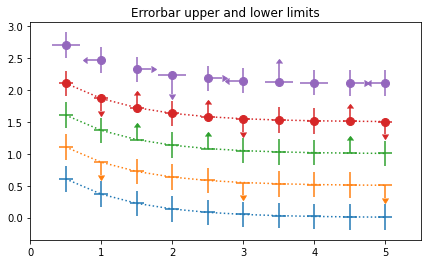

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# example data
x = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
y = np.exp(-x)
xerr = 0.1
yerr = 0.2

# lower & upper limits of the error
lolims = np.array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0], dtype=bool)
uplims = np.array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1], dtype=bool)
ls = 'dotted'

fig, ax = plt.subplots(figsize=(7, 4))

# standard error bars
ax.errorbar(x, y, xerr=xerr, yerr=yerr, linestyle=ls)

# including upper limits
ax.errorbar(x, y + 0.5, xerr=xerr, yerr=yerr, uplims=uplims,
            linestyle=ls)

# including lower limits
ax.errorbar(x, y + 1.0, xerr=xerr, yerr=yerr, lolims=lolims,
            linestyle=ls)

# including upper and lower limits
ax.errorbar(x, y + 1.5, xerr=xerr, yerr=yerr,
            lolims=lolims, uplims=uplims,
            marker='o', markersize=8,
            linestyle=ls)

# Plot a series with lower and upper limits in both x & y
# constant x-error with varying y-error
xerr = 0.2
yerr = np.full_like(x, 0.2)
yerr[[3, 6]] = 0.3

# mock up some limits by modifying previous data
xlolims = lolims
xuplims = uplims
lolims = np.zeros_like(x)
uplims = np.zeros_like(x)
lolims[[6]] = True  # only limited at this index
uplims[[3]] = True  # only limited at this index

# do the plotting
ax.errorbar(x, y + 2.1, xerr=xerr, yerr=yerr,
            xlolims=xlolims, xuplims=xuplims,
            uplims=uplims, lolims=lolims,
            marker='o', markersize=8,
            linestyle='none')

# tidy up the figure
ax.set_xlim((0, 5.5))
ax.set_title('Errorbar upper and lower limits')
plt.show()